In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [37]:
class Model(nn.Module):
    
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        
        super().__init__()
        # How many layers ?
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
    
    
    def forward(self, x):
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x

In [38]:
torch.manual_seed(32)

model = Model()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv('/Users/apple/Documents/PyTorch_Tutorial/Data/iris.csv')

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


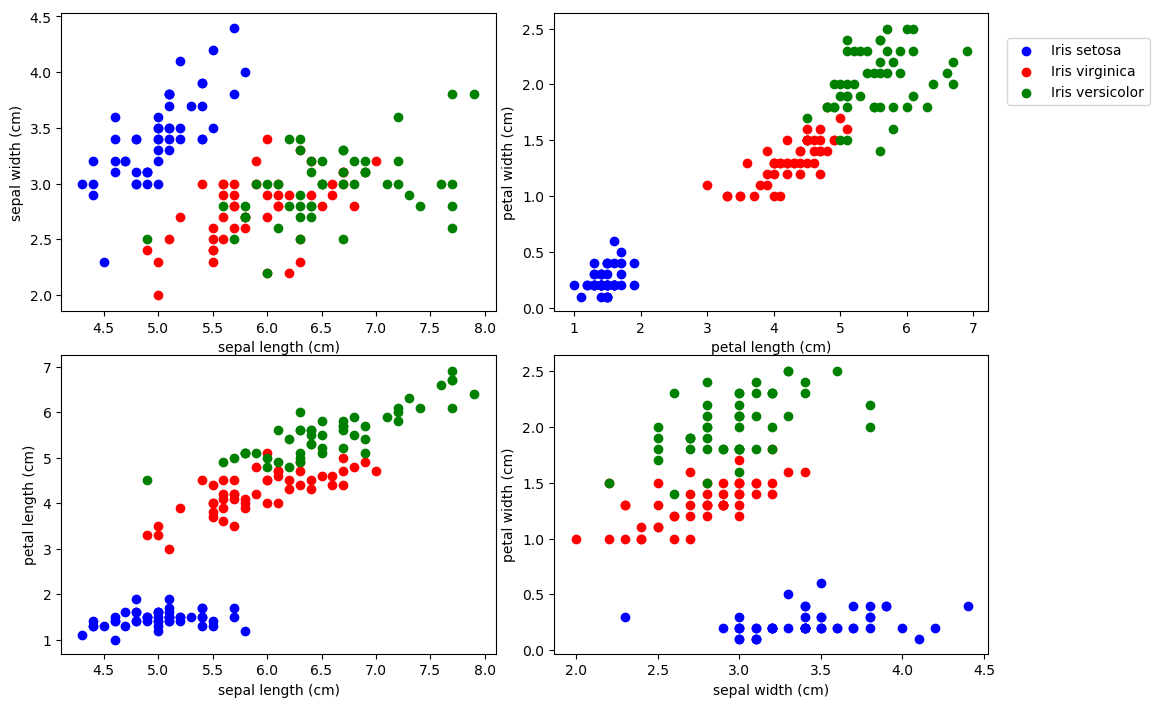

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df["target"]==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [43]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [46]:
epochs = 101
losses = []

for epoch in range(epochs):
    
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    if epoch%10==0:
        print(f'Epoch: {epoch}, Loss: {loss}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 1.1507114171981812
Epoch: 10, Loss: 0.9377315640449524
Epoch: 20, Loss: 0.779825747013092
Epoch: 30, Loss: 0.6099401712417603
Epoch: 40, Loss: 0.40079936385154724
Epoch: 50, Loss: 0.25436320900917053
Epoch: 60, Loss: 0.15053054690361023
Epoch: 70, Loss: 0.10086946189403534
Epoch: 80, Loss: 0.08128315955400467
Epoch: 90, Loss: 0.0723142921924591
Epoch: 100, Loss: 0.0671333372592926


Text(0, 0.5, 'Loss')

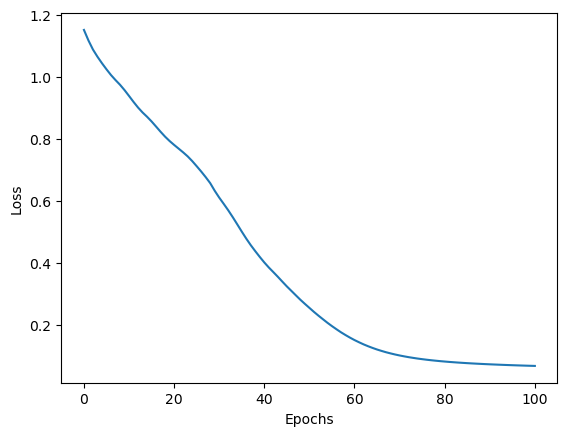

In [47]:
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [48]:
with torch.no_grad():
    
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [49]:
loss

tensor(0.0585)

In [55]:
correct = 0

for i, data in enumerate(X_test):
    y_val = model.forward(data)
    
    print(f"{i+1}.) {str(y_val.argmax().item())} {y_test[i]}")
    
    if y_val.argmax().item() == y_test[i]:
        correct+=1
    
    
print(f'We got {correct} correct !')

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 2 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2
We got 30 correct !


In [56]:
torch.save(model.state_dict(),"pytorch_iris_model_simple_regression_model.pt")

In [58]:
new_model = Model()
new_model.load_state_dict(torch.load('pytorch_iris_model_simple_regression_model.pt'))

<All keys matched successfully>

In [59]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [60]:
mystery_iris = torch.tensor([5.6,3.7,2.2,0.5])

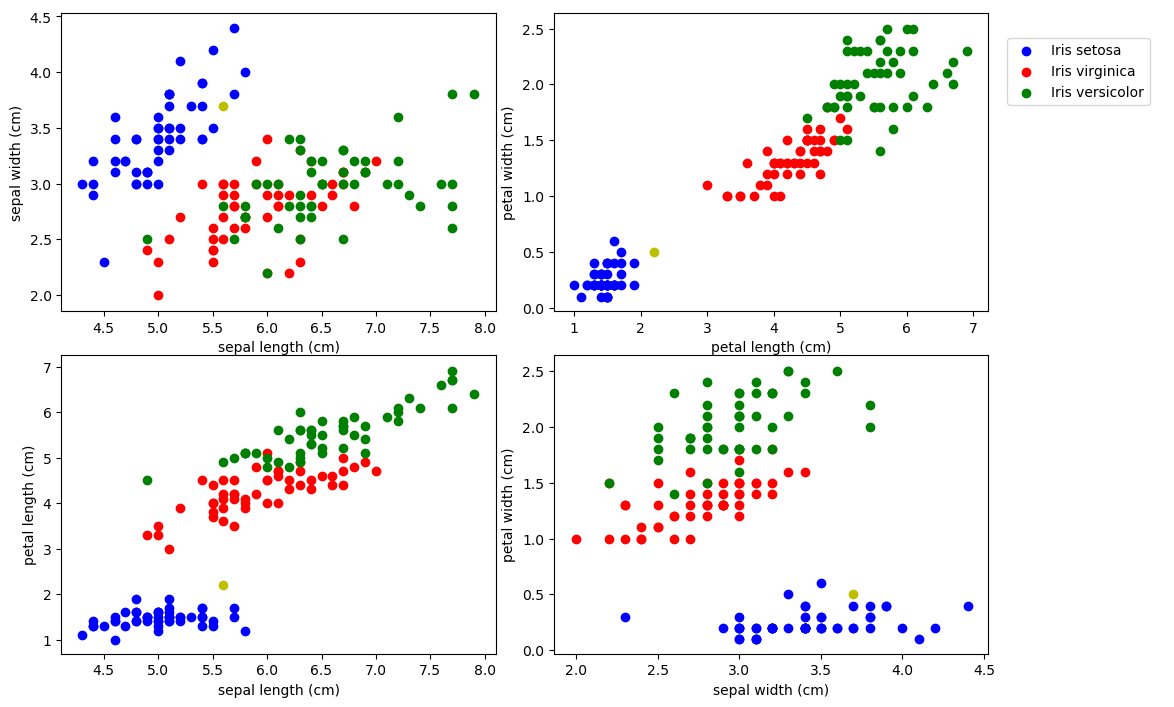

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b','r','g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df["target"]==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]],color='y')
        
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [64]:
with torch.no_grad():
    print(new_model(mystery_iris).argmax())

tensor(0)
